In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
y = breast_cancer.target

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =0,stratify=y)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [13]:
def plot_boxplot_and_hist(data, variable):
    
    
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    sns.boxplot(x=data[variable], ax=ax_box,color="orange")
    sns.histplot(data=data, x=variable, ax=ax_hist,color="orange")

    ax_box.set(xlabel="")
    plt.title(variable)
    plt.show()

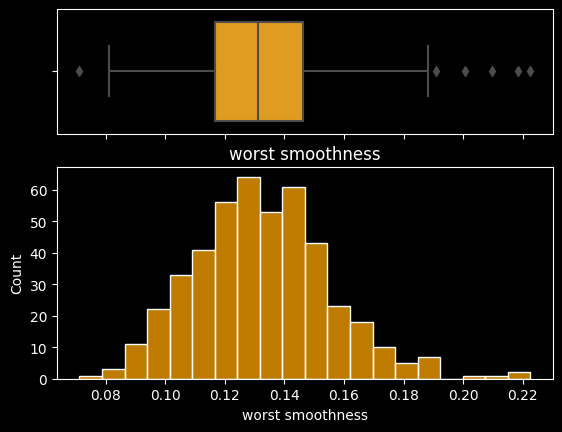

In [14]:
plot_boxplot_and_hist(X_train, "worst smoothness")

In [18]:
#normal dist
def find_limits(df,variable,fold):
    lower_limit = df[variable].mean() - fold * df[variable].std()
    upper_limit = df[variable].mean() + fold * df[variable].std()
    return lower_limit, upper_limit 

In [21]:
lower_limit, upper_limit = find_limits(X_train,"worst smoothness",3)
lower_limit, upper_limit

(0.06421021126092197, 0.20071959093688024)

In [22]:
X_train["worst smoothness"].min() , X_train["worst smoothness"].max()

(0.07117, 0.2226)

In [23]:
X_train["worst smoothness"].clip(lower = lower_limit, upper = upper_limit,inplace=True)
X_test["worst smoothness"].clip(lower = lower_limit, upper =upper_limit,inplace=True)

In [24]:
X_train["worst smoothness"].min() , X_train["worst smoothness"].max()

(0.07117, 0.20071959093688024)

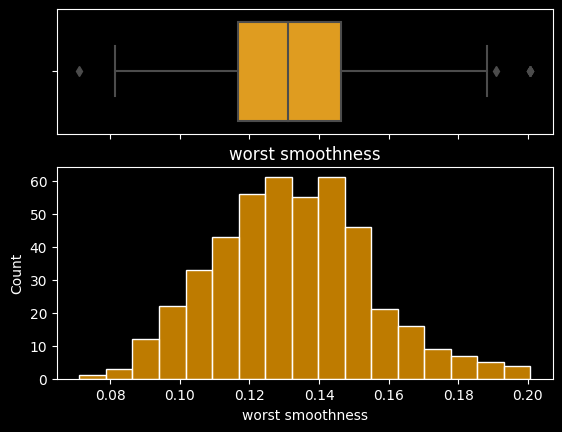

In [25]:
plot_boxplot_and_hist(X_train, "worst smoothness")

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =0,stratify=y)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [39]:
# iqr skewed
def find_limits(df,variable,fold):
    
    iqr = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_limit = df[variable].quantile(0.25) - (iqr*fold)
    upper_limit = df[variable].quantile(0.75) + (iqr*fold)
    
    return lower_limit, upper_limit

In [40]:
lower_limit, upper_limit = find_limits(X_train,"worst smoothness",1.5)
lower_limit, upper_limit

(0.07259999999999997, 0.19060000000000002)

In [41]:
X_train["worst smoothness"].clip(lower=lower_limit, upper=upper_limit,inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit, upper=upper_limit,inplace=True)

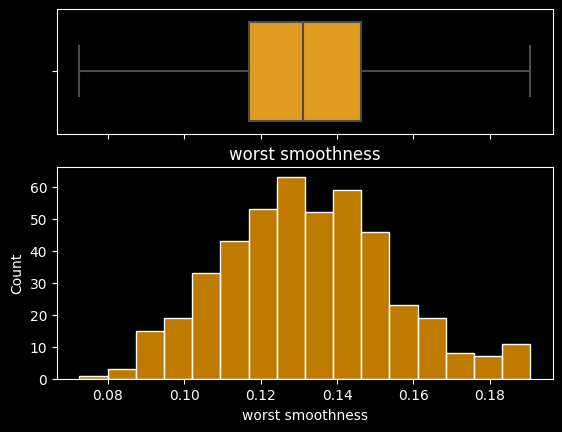

In [42]:
plot_boxplot_and_hist(X_train, "worst smoothness")

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state =0,stratify=y)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [44]:
#quantiles 
def find_limits(df,variable):
    lower_limit = df[variable].quantile(0.05)
    upper_limit = df[variable].quantile(0.95)
    
    return lower_limit, upper_limit

In [45]:
lower_limit, upper_limit = find_limits(X_train,"worst smoothness")
lower_limit, upper_limit

(0.096755, 0.17050999999999997)

In [46]:
X_train["worst smoothness"].clip(lower=lower_limit,upper=upper_limit,inplace=True)
X_test["worst smoothness"].clip(lower=lower_limit,upper=upper_limit,inplace=True)

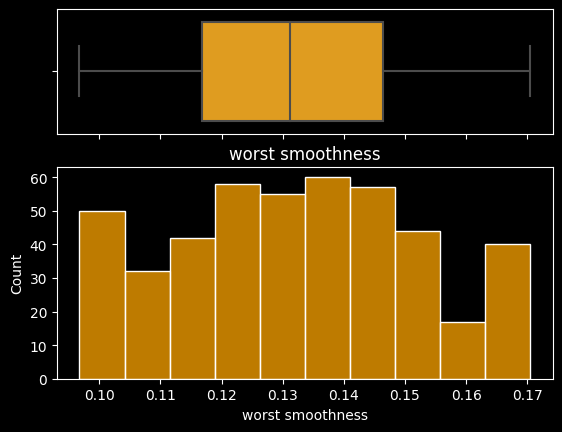

In [47]:
plot_boxplot_and_hist(X_train, "worst smoothness")